In [4]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [74]:
#Plot Figure Dimensions
plt.rcParams["figure.figsize"] = (10, 10)

In [6]:
#Read The Data
data = pd.read_csv("../diabetes.csv")

In [7]:
#Data SHape
data.shape

(768, 9)

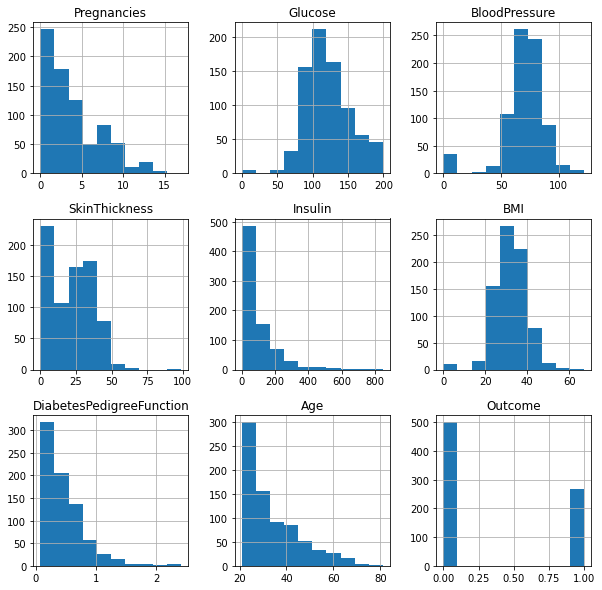

In [75]:
#Plotting different variables' distribution
data.hist()
plt.savefig('DataDistribution.png')

In [9]:
# Exploratory Data Analysis
# Some variables like Glucose, BloodPressure, BMI are normally distributed. Others are a bit skewed.

<AxesSubplot:xlabel='Pregnancies'>

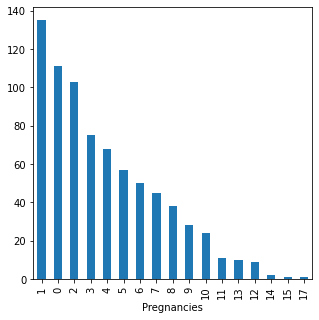

In [10]:
data['Pregnancies'].value_counts().plot(kind='bar') 

In [11]:
#Lets compare Pregnancies and outcome

In [12]:
import seaborn as sns

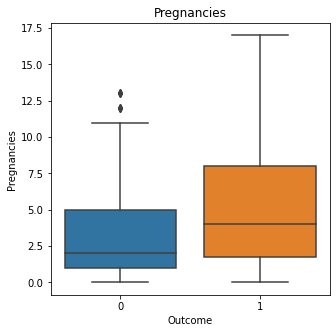

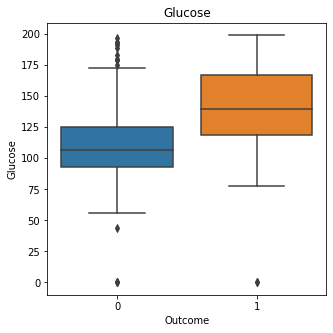

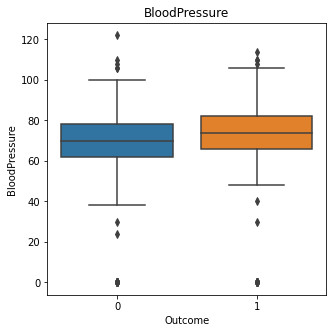

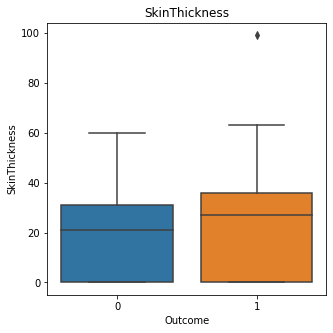

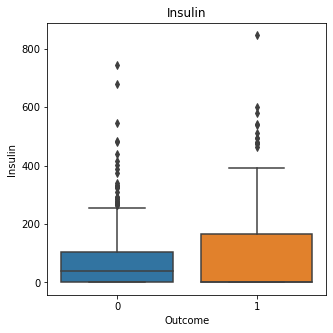

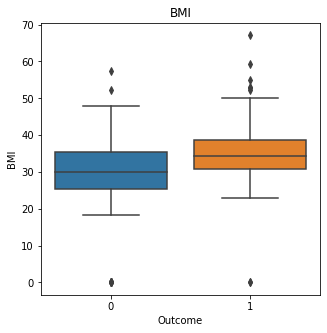

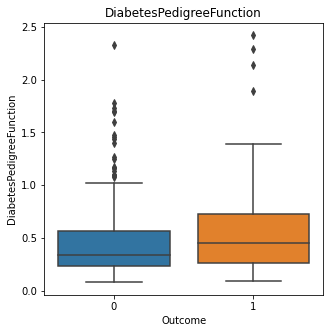

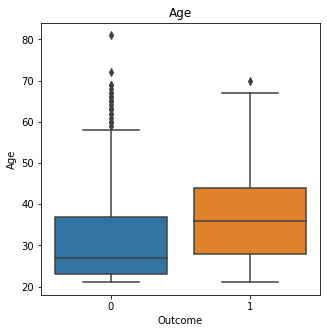

In [13]:
#BoxPlot for each variable
import matplotlib.pyplot as plt
for feature in data.columns[:-1]:
    plt.figure()
    sns.boxplot(x="Outcome", y=feature, data=data)
    plt.title(feature)
    plt.savefig(f'./Visualizations/BoxPlots/{feature}+BoxPlot.png')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

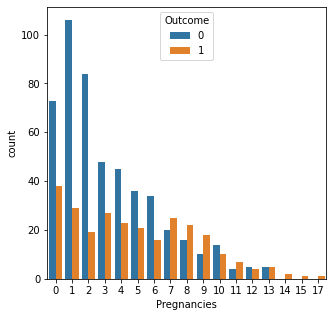

In [14]:
sns.countplot(data = data, x= 'Pregnancies', hue='Outcome')

#### There is some relation to number of pregnanices and Outcome diabetes.. As Number of Pregnancies increase Outcome as Diabetes increase

In [19]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [21]:
#Split data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)
pred_lr = lr.predict(X_val)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
accuracy_score(y_train, pred_train_lr)

0.7795138888888888

In [27]:
accuracy_score(y_val, pred_lr)

0.7291666666666666

In [28]:
precision_score(y_val, pred_lr)

0.6164383561643836

In [29]:
recall_score(y_val, pred_lr)

0.6521739130434783

In [30]:
f1_score(y_val, pred_lr)

0.6338028169014085

In [31]:
cm = confusion_matrix(y_val, pred_lr)

In [32]:
import matplotlib.pyplot as plt

In [33]:
cm

array([[95, 28],
       [24, 45]], dtype=int64)

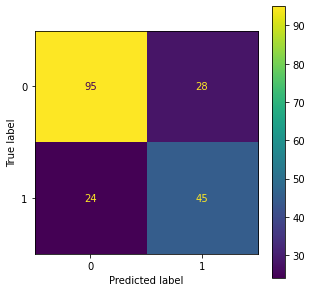

In [34]:
#Confusion Matrix
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot()

In [35]:
f1_score(y_val, pred_lr)

0.6338028169014085

In [36]:
#SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC()

In [39]:
svc.fit(X_train, y_train)
pred_train_svc = svc.predict(X_train)
pred_svc = svc.predict(X_val)

In [40]:
f1_score(y_val, pred_svc)

0.6000000000000001

In [41]:
accuracy_score(y_train, pred_train_svc)


0.8315972222222222

In [42]:
accuracy_score(y_val, pred_svc)


0.7291666666666666

In [43]:
#Overfitting observed in SCV

In [44]:
import matplotlib.pyplot as plt

In [45]:
cm_sv = confusion_matrix(y_val, pred_svc, labels = svc.classes_)

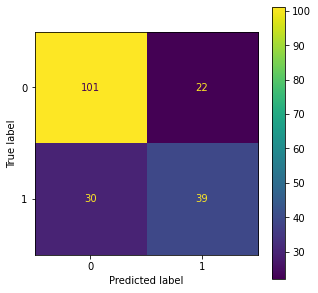

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sv,
...                               display_labels=svc.classes_)
disp.plot()

In [47]:
precision_score(y_val, pred_svc)

0.639344262295082

In [48]:
recall_score(y_val, pred_svc)

0.5652173913043478

In [49]:
f1_score(y_val, pred_svc)

0.6000000000000001

In [50]:
#Writing a function to fit the data and get results
def fit(model) :
    model.fit(X_train, y_train)
    pred_train_model = model.predict(X_train)
    pred_model = model.predict(X_val)
    print(f'For Model {model} TRAIN Accuracy Score is {accuracy_score(pred_train_model, y_train)}')
    print(f'For Model {model} Accuracy Score is {accuracy_score(pred_model, y_val)}')
    print(f'For Model {model} precision Score is {precision_score(pred_model, y_val)}')
    print(f'For Model {model} recall Score is {recall_score(pred_model, y_val)}')
    print(f'For Model {model} f1 Score is {f1_score(pred_model, y_val)}')
    cm_model = confusion_matrix(y_val, pred_model, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_model,
                                  display_labels=model.classes_)
    disp.plot()

For Model DecisionTreeClassifier() TRAIN Accuracy Score is 1.0
For Model DecisionTreeClassifier() Accuracy Score is 0.6979166666666666
For Model DecisionTreeClassifier() precision Score is 0.6521739130434783
For Model DecisionTreeClassifier() recall Score is 0.569620253164557
For Model DecisionTreeClassifier() f1 Score is 0.6081081081081081


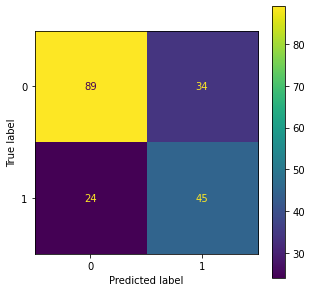

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
fit(tree)

In [52]:
from sklearn.ensemble import RandomForestClassifier

For Model RandomForestClassifier(max_depth=4) TRAIN Accuracy Score is 0.8246527777777778
For Model RandomForestClassifier(max_depth=4) Accuracy Score is 0.765625
For Model RandomForestClassifier(max_depth=4) precision Score is 0.5797101449275363
For Model RandomForestClassifier(max_depth=4) recall Score is 0.7142857142857143
For Model RandomForestClassifier(max_depth=4) f1 Score is 0.64


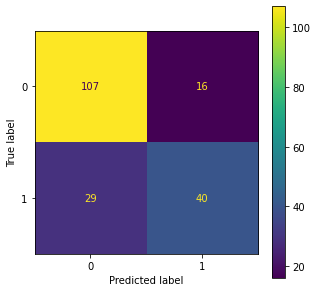

In [53]:
#Random Forrest
model = RandomForestClassifier(n_estimators=100, max_depth=4)
fit(model)

In [55]:
from sklearn import metrics

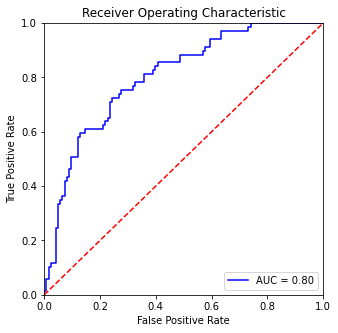

In [58]:
#ROC AUC
probs = model.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [59]:
def roc_auc_curve(model) :
    robs = model.predict_proba(X_val)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()

For Model KNeighborsClassifier() TRAIN Accuracy Score is 0.8333333333333334
For Model KNeighborsClassifier() Accuracy Score is 0.6822916666666666
For Model KNeighborsClassifier() precision Score is 0.5362318840579711
For Model KNeighborsClassifier() recall Score is 0.5606060606060606
For Model KNeighborsClassifier() f1 Score is 0.548148148148148


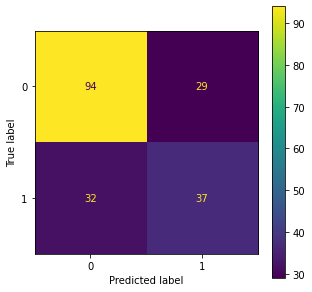

In [62]:
fit(knn)

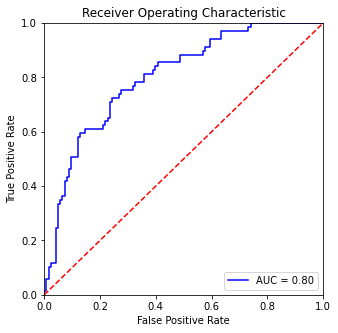

In [63]:
roc_auc_curve(knn)

In [68]:
def hyperparameter_tuning(clf, params, grid=True) :
    if grid == True :
        grid_search = GridSearchCV(clf, params)
    else :
         grid_search = RandomizedSearchCV(clf, params)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    pred = best_model.predict(X_val)
    train_pred = best_model.predict(X_train)
    print(f'For Model {clf} TRAIN Accuracy Score is {accuracy_score(train_pred, y_train)}')
    print(f'For Model {clf} Accuracy Score is {accuracy_score(pred, y_val)}')
    print(f'For Model {clf} precision Score is {precision_score(pred, y_val)}')
    print(f'For Model {clf} recall Score is {recall_score(pred, y_val)}')
    print(f'For Model {clf} f1 Score is {f1_score(pred, y_val)}')
    cm_model = confusion_matrix(y_val, pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_model,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()
    roc_auc_curve(best_model)
    return best_model

For Model DecisionTreeClassifier() TRAIN Accuracy Score is 0.8246527777777778
For Model DecisionTreeClassifier() Accuracy Score is 0.7552083333333334
For Model DecisionTreeClassifier() precision Score is 0.5797101449275363
For Model DecisionTreeClassifier() recall Score is 0.6896551724137931
For Model DecisionTreeClassifier() f1 Score is 0.6299212598425198


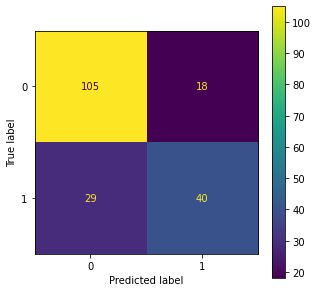

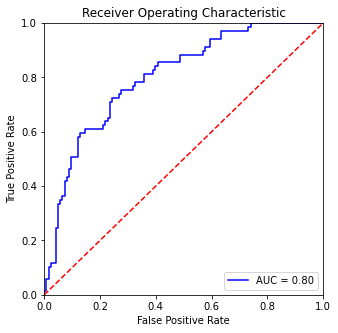

In [69]:
params  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = DecisionTreeClassifier()
model = hyperparameter_tuning(clf, params)

In [70]:
rf = RandomForestClassifier()
hyper_params =     {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

For Model RandomForestClassifier() TRAIN Accuracy Score is 0.8541666666666666
For Model RandomForestClassifier() Accuracy Score is 0.7447916666666666
For Model RandomForestClassifier() precision Score is 0.5942028985507246
For Model RandomForestClassifier() recall Score is 0.6612903225806451
For Model RandomForestClassifier() f1 Score is 0.6259541984732824


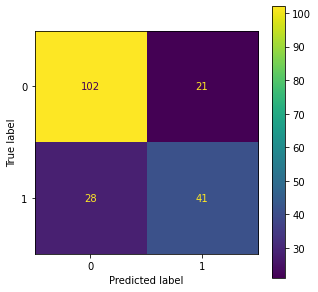

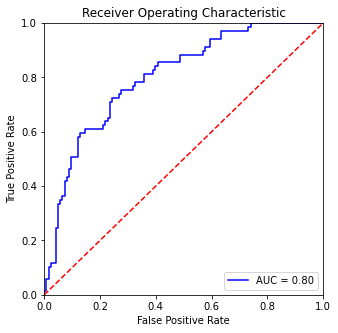

In [71]:
model = hyperparameter_tuning(rf, hyper_params)

In [54]:
model

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200)